<a href="https://colab.research.google.com/github/marquinamaria/data/blob/main/Chicago_taxi_trips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
!pip install google-cloud-bigquery pandas matplotlib seaborn numpy==1.24.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 29.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.1 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.1 which is incompatible.


In [61]:
from google.colab import auth
auth.authenticate_user()

In [62]:
from google.cloud import bigquery

In [63]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
project_id = 't-decoder-254713'
client = bigquery.Client(project=project_id)

## Analisis de `payment_type`

In [65]:
query = """
SELECT payment_type
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
"""

In [66]:
job_config = bigquery.QueryJobConfig(use_query_cache=True)
df = client.query(query, job_config=job_config).to_dataframe()

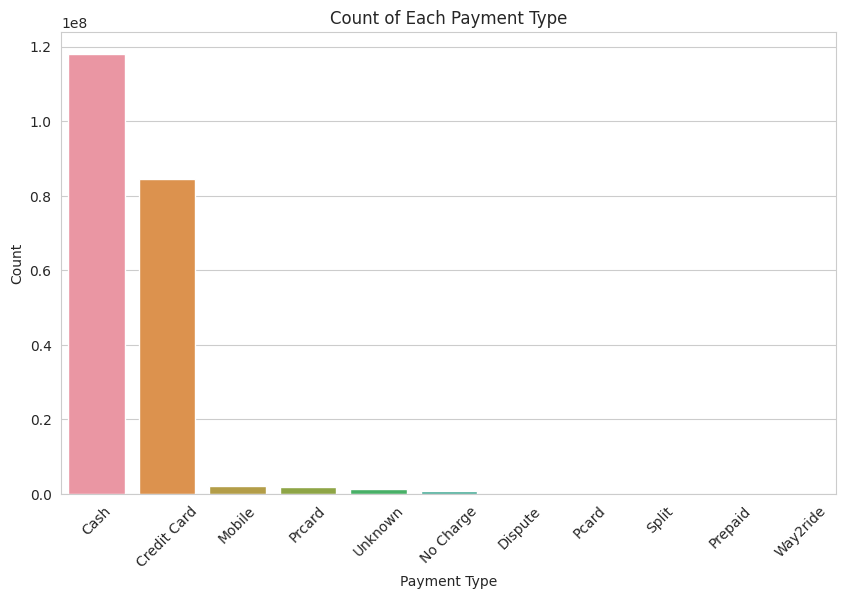

In [67]:
payment_type_counts = df['payment_type'].value_counts()

# Plot the count of each payment type
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values)
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.title('Count of Each Payment Type')
plt.xticks(rotation=45)
plt.show()

In [68]:
payment_type_percentage = payment_type_counts / len(df) * 100
payment_type_percentage

Cash           56.489638
Credit Card    40.401791
Mobile          1.055697
Prcard          0.920184
Unknown         0.677000
No Charge       0.393476
Dispute         0.041983
Pcard           0.017648
Split           0.001647
Prepaid         0.000868
Way2ride        0.000068
Name: payment_type, dtype: float64

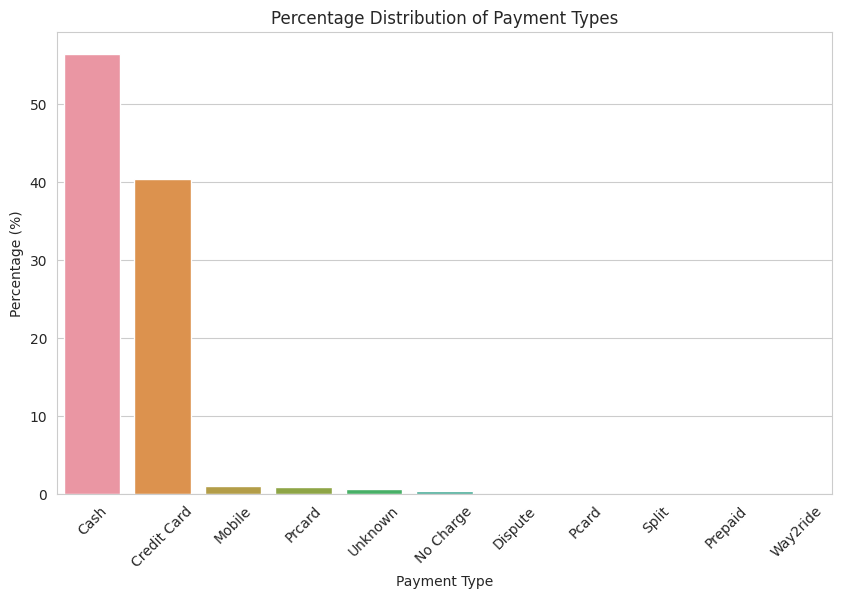

In [69]:
# Plot the percentage distribution of payment types
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_type_percentage.index, y=payment_type_percentage.values)
plt.xlabel('Payment Type')
plt.ylabel('Percentage (%)')
plt.title('Percentage Distribution of Payment Types')
plt.xticks(rotation=45)
plt.show()


In [70]:
query = """
SELECT
  EXTRACT(YEAR FROM trip_start_timestamp) AS year,
  payment_type,
  COUNT(*) AS trip_count
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY year, payment_type
ORDER BY year, payment_type;
"""

In [71]:
job_config = bigquery.QueryJobConfig(use_query_cache=True)
# query_job = client.query(query, job_config=job_config)
# results = query_job.result()

In [72]:
import pandas as pd

In [73]:
df = client.query(query, job_config=job_config).to_dataframe()

In [74]:
df

,year,payment_type,trip_count
0,2013,Cash,18708574
1,2013,Credit Card,8099371
2,2013,Dispute,21222
3,2013,No Charge,287740
4,2013,Pcard,7951
...,...,...,...
84,2023,Dispute,1124
85,2023,Mobile,580667
86,2023,No Charge,1587
87,2023,Prcard,379855


In [75]:
pivot_df = df.pivot(index='year', columns='payment_type', values='trip_count')

In [76]:
pivot_df

payment_type,Cash,Credit Card,Dispute,Mobile,No Charge,Pcard,Prcard,Prepaid,Split,Unknown,Way2ride
year,,,,,,,,,,,
2013,18708574,8099371,21222,<NA>,287740,7951,531,<NA>,<NA>,91911,<NA>
2014,23869771,13301197,12118,<NA>,154683,6673,1751,<NA>,<NA>,48886,<NA>
2015,18352681,13829042,10044,<NA>,140011,6374,2294,<NA>,<NA>,45081,<NA>
2016,17817335,13774278,11951,<NA>,98850,5403,10713,<NA>,<NA>,37731,142
2017,13741223,11069263,9007,14208,59400,5652,43597,35,2014,35212,<NA>
2018,10763641,9684133,6737,116711,36791,4295,60928,970,1428,55471,<NA>
2019,8086401,7854492,6772,229468,32576,526,154762,622,<NA>,110821,<NA>
2020,1894992,1509349,2485,63992,4949,<NA>,239639,174,<NA>,173251,<NA>
2021,1598282,1294674,2969,274176,2407,<NA>,441580,4,<NA>,333585,<NA>


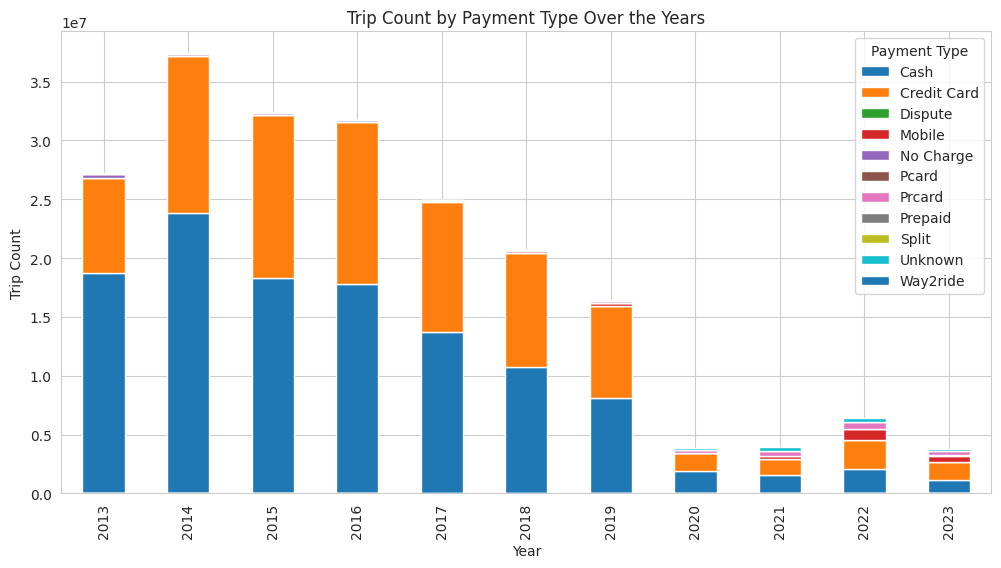

In [77]:
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Trip Count by Payment Type Over the Years')
plt.xlabel('Year')
plt.ylabel('Trip Count')
plt.legend(title='Payment Type')
plt.show()

In [78]:
pivot_df['Mobile'] = pivot_df['Mobile'].fillna(0)
pivot_df['Prepaid'] = pivot_df['Prepaid'].fillna(0)
pivot_df['Pcard'] = pivot_df['Pcard'].fillna(0)
pivot_df['Split'] = pivot_df['Split'].fillna(0)
pivot_df['Way2ride'] = pivot_df['Way2ride'].fillna(0)

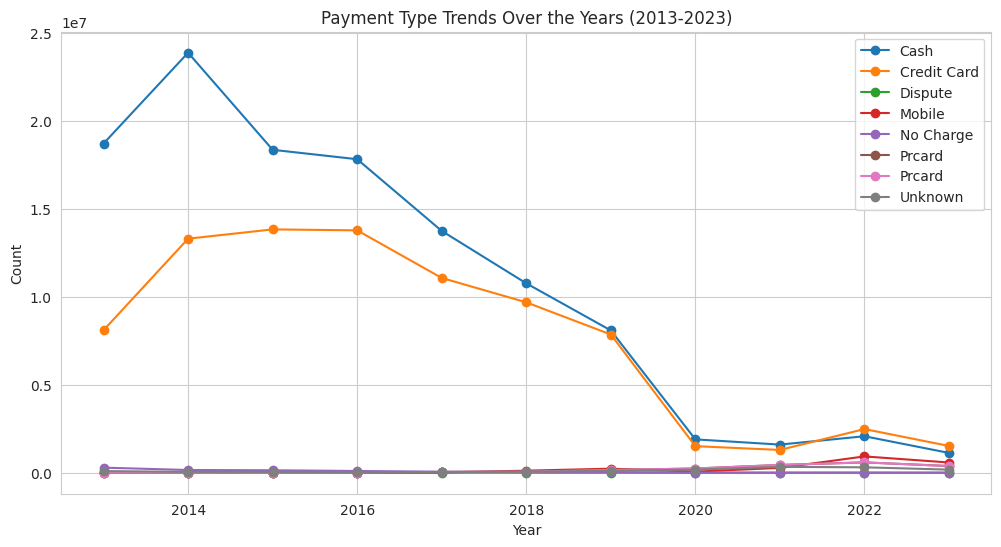

In [79]:
plt.figure(figsize=(12, 6))
plt.plot(pivot_df.index, pivot_df['Cash'], label='Cash', marker='o')
plt.plot(pivot_df.index, pivot_df['Credit Card'], label='Credit Card', marker='o')
plt.plot(pivot_df.index, pivot_df['Dispute'], label='Dispute', marker='o')
plt.plot(pivot_df.index, pivot_df['Mobile'], label='Mobile', marker='o')
plt.plot(pivot_df.index, pivot_df['No Charge'], label='No Charge', marker='o')
plt.plot(pivot_df.index, pivot_df['Prcard'], label='Prcard', marker='o')
plt.plot(pivot_df.index, pivot_df['Prcard'], label='Prcard', marker='o')
plt.plot(pivot_df.index, pivot_df['Unknown'], label='Unknown', marker='o')

plt.title('Payment Type Trends Over the Years (2013-2023)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)

plt.show()

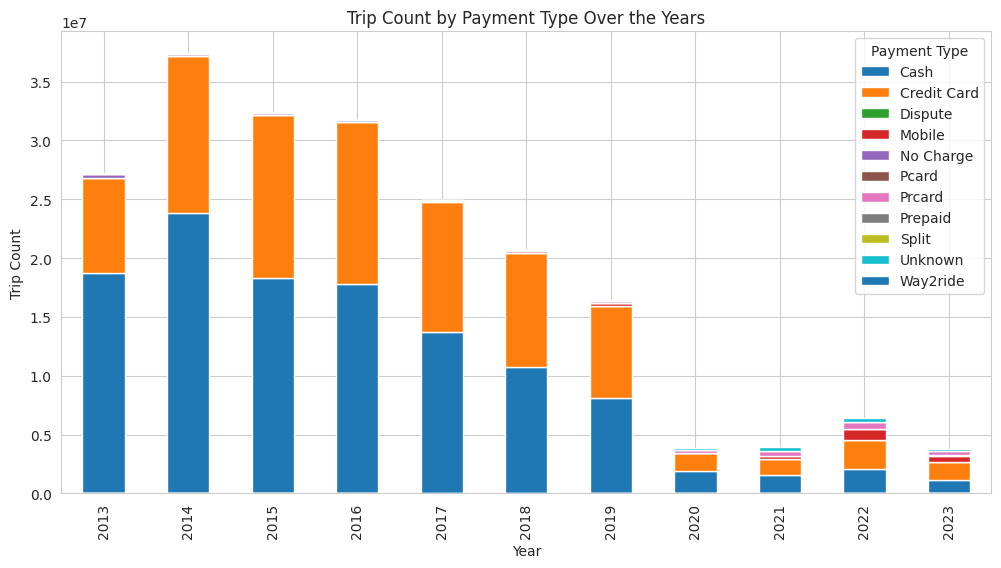

In [80]:
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Trip Count by Payment Type Over the Years')
plt.xlabel('Year')
plt.ylabel('Trip Count')
plt.legend(title='Payment Type')
plt.show()

In [81]:
query = """
SELECT
  EXTRACT(YEAR FROM trip_start_timestamp) AS year,
  payment_type,
  SUM(fare) AS total_fare,
  SUM(tips) AS total_tips,
  SUM(tolls) AS total_tolls,
  SUM(extras) AS total_extras,
  SUM(trip_total) AS total_trip_total
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE EXTRACT(YEAR FROM trip_start_timestamp) BETWEEN 2013 AND 2023
GROUP BY year, payment_type
ORDER BY year, payment_type;
"""

In [82]:
df = client.query(query, job_config=job_config).to_dataframe()

In [83]:
df

,year,payment_type,total_fare,total_tips,total_tolls,total_extras,total_trip_total
0,2013,Cash,2.089891e+08,1.028610e+05,392441.04,16200851.90,2.256897e+08
1,2013,Credit Card,1.249079e+08,2.575248e+07,18648.73,6688766.54,1.573682e+08
2,2013,Dispute,2.480517e+05,5.501500e+02,1893.91,29330.45,2.798262e+05
3,2013,No Charge,3.805167e+06,2.970373e+05,2361.96,122427.79,4.226996e+06
4,2013,Pcard,6.471654e+04,1.099570e+03,335.50,2756.17,6.890778e+04
...,...,...,...,...,...,...,...
84,2023,Dispute,3.326866e+04,2.060000e+01,68.88,4998.75,3.835689e+04
85,2023,Mobile,9.050138e+06,1.801817e+06,2536.08,272270.70,1.117835e+07
86,2023,No Charge,5.251313e+04,2.968500e+02,112.25,7842.69,6.076492e+04
87,2023,Prcard,9.656033e+06,8.610106e+04,3.52,26264.39,9.768422e+06


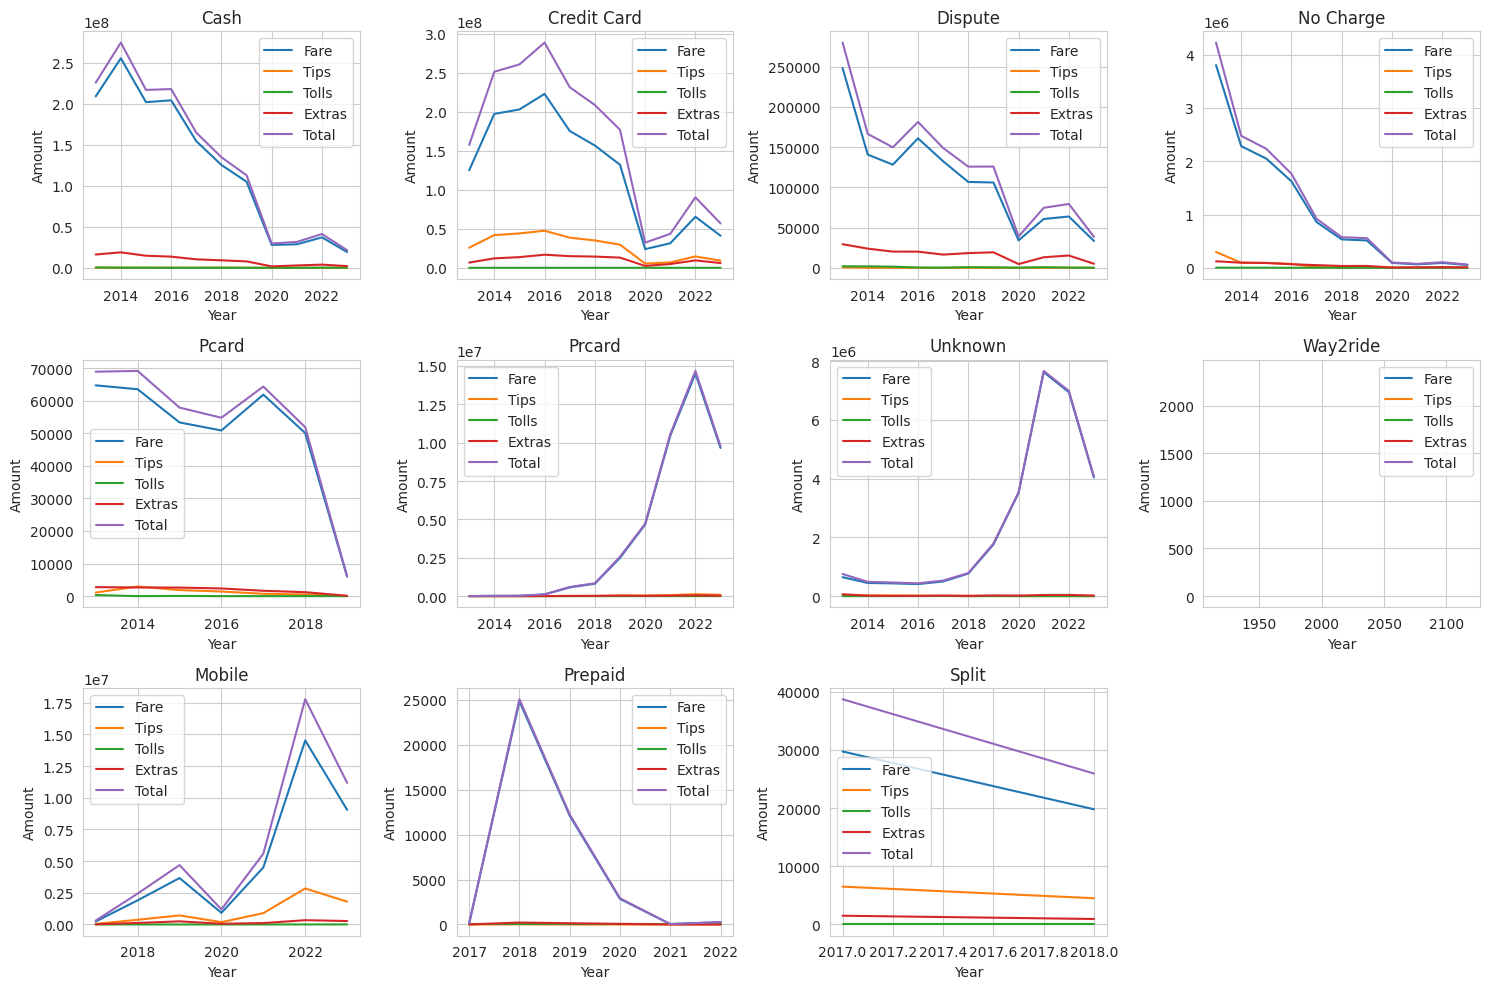

In [84]:
# Set the style for the plots
sns.set_style("whitegrid")

# Create subplots for each payment type trend
payment_types = df['payment_type'].unique()

plt.figure(figsize=(15, 10))

for idx, payment_type in enumerate(payment_types):
    plt.subplot(3, 4, idx + 1)
    data = df[df['payment_type'] == payment_type]
    plt.plot(data['year'], data['total_fare'], label='Fare')
    plt.plot(data['year'], data['total_tips'], label='Tips')
    plt.plot(data['year'], data['total_tolls'], label='Tolls')
    plt.plot(data['year'], data['total_extras'], label='Extras')
    plt.plot(data['year'], data['total_trip_total'], label='Total')
    plt.title(payment_type)
    plt.xlabel('Year')
    plt.ylabel('Amount')
    plt.legend()

plt.tight_layout()
plt.show()


In [85]:
query = """
SELECT
  EXTRACT(YEAR FROM trip_start_timestamp) AS year,
  EXTRACT(MONTH FROM trip_start_timestamp) AS month,
  EXTRACT(DAY FROM trip_start_timestamp) AS day,
  EXTRACT(HOUR FROM trip_start_timestamp) AS hour,
  payment_type,
  COUNT(*) AS trip_count
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY year, month, day, hour, payment_type
ORDER BY year, month, day, hour, trip_count DESC
"""

In [86]:
df_hour = client.query(query, job_config=job_config).to_dataframe()

In [87]:
df_hour

,year,month,day,hour,payment_type,trip_count
0,2013,1,1,0,Cash,3957
1,2013,1,1,0,Credit Card,710
2,2013,1,1,0,No Charge,43
3,2013,1,1,0,Dispute,8
4,2013,1,1,0,Unknown,3
...,...,...,...,...,...,...
503307,2023,7,31,23,No Charge,1
503308,2023,8,1,0,Credit Card,23
503309,2023,8,1,0,Cash,4
503310,2023,8,1,0,Unknown,2


In [88]:
query = """
WITH YearlyPayments AS (
  SELECT
    CASE WHEN company is null then 'Unknown' ELSE company END AS company,
    payment_type,
    EXTRACT(YEAR FROM trip_start_timestamp) AS trip_year,
    COUNT(*) AS trip_count
  FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
  GROUP BY
    company,
    payment_type,
    trip_year
)
, TotalPayments AS (
  SELECT
    CASE WHEN company is null then 'Unknown' ELSE company END AS company,
    EXTRACT(YEAR FROM trip_start_timestamp) AS trip_year,
    COUNT(*) AS total_trip_count
  FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
  GROUP BY
    company,
    trip_year
)
, PaymentShare AS (
  SELECT
    yp.company,
    yp.payment_type,
    yp.trip_year,
    (yp.trip_count / tp.total_trip_count) * 100 AS market_share
  FROM
    YearlyPayments yp
  JOIN
    TotalPayments tp
  ON
    yp.company = tp.company
    AND yp.trip_year = tp.trip_year
)
SELECT
  company,
  payment_type,
  trip_year,
  SUM(market_share) AS total_market_share
FROM
  PaymentShare
GROUP BY
  company,
  payment_type,
  trip_year
ORDER BY
  company,
  trip_year
"""

In [89]:
query_job = client.query(query, job_config=job_config)

In [90]:
df = query_job.result().to_dataframe()

In [91]:
df

,company,payment_type,trip_year,total_market_share
0,0118 - 42111 Godfrey S.Awir,Cash,2014,66.517591
1,0118 - 42111 Godfrey S.Awir,Credit Card,2014,32.975552
2,0118 - 42111 Godfrey S.Awir,Dispute,2014,0.477042
3,0118 - 42111 Godfrey S.Awir,Unknown,2014,0.029815
4,0118 - 42111 Godfrey S.Awir,Cash,2015,65.671642
...,...,...,...,...
2651,Yellow Cab,Credit Card,2017,43.291086
2652,Yellow Cab,Cash,2018,53.828821
2653,Yellow Cab,Credit Card,2018,46.171179
2654,Yellow Cab,Credit Card,2019,52.672453


In [92]:
!pip list | grep numpy

numpy                            1.24.1


In [93]:
!pip list | grep seaborn

seaborn                          0.12.2


In [94]:
df.dtypes

company                object
payment_type           object
trip_year               Int64
total_market_share    float64
dtype: object

In [95]:
df['trip_year'].values

<IntegerArray>
[2014, 2014, 2014, 2014, 2015, 2015, 2015, 2015, 2016, 2016,
 ...
 2015, 2015, 2016, 2016, 2017, 2017, 2018, 2018, 2019, 2019]
Length: 2656, dtype: Int64

In [96]:
df['total_market_share'].values

array([66.51759094, 32.97555158,  0.47704234, ..., 46.17117923,
       52.67245317, 47.32754683])

In [97]:
df['payment_type'].values

array(['Cash', 'Credit Card', 'Dispute', ..., 'Credit Card',
       'Credit Card', 'Cash'], dtype=object)

In [98]:
df['company'].values

array(['0118 - 42111 Godfrey S.Awir', '0118 - 42111 Godfrey S.Awir',
       '0118 - 42111 Godfrey S.Awir', ..., 'Yellow Cab', 'Yellow Cab',
       'Yellow Cab'], dtype=object)

In [99]:
# Calculate the total market share for each company
total_market_share = df.groupby('company')['total_market_share'].sum().reset_index()

# Select the top 5 companies with the highest total market share
top_5_companies = total_market_share.nlargest(5, 'total_market_share')['company']

# Filter the DataFrame to include only the top 5 companies
df_top_5 = df[df['company'].isin(top_5_companies)]

# Pivot the DataFrame to create a stacked format
df_pivot = df_top_5.pivot_table(index=['company', 'trip_year'], columns='payment_type', values='total_market_share', fill_value=0)
df_pivot

payment_type                                Cash  Credit Card   Dispute  \
company                     trip_year                                     
2733 - 74600 Benny Jona     2014       60.341297    39.590444  0.068259   
                            2015       54.032480    45.884944  0.027525   
                            2016       49.864253    50.015083  0.060332   
                            2017       44.121532    55.515192  0.297226   
                            2018       39.690722    60.034364  0.206186   
                            2019       36.303357    63.323663  0.165769   
                            2020       36.383442    63.398693  0.108932   
                            2021       37.536657    62.170088  0.073314   
                            2022       27.118644    72.639225  0.000000   
                            2023       28.502415    70.772947  0.120773   
3556 - 36214 RC Andrews Cab 2014       74.497992    16.265060  0.602410   
                            2015       51.976401    23.539823  0.000000   
                            2016       46.577778    19.377778  0.444444   
                            2017       37.074148    13.527054  0.300601   
                            2018       26.666667     9.206349  0.761905   
                            2019       24.390244     4.878049  0.000000   
                            2020       13.288835     2.366505  0.242718   
                            2021       11.522443     1.156872  0.462749   
                            2022       11.194030     1.990050  0.149254   
                            2023       10.917031     0.873362  0.000000   
Choice Taxi Association     2013       70.769536    27.932678  0.355616   
                            2014       63.810240    35.302453  0.186431   
                            2015       55.772057    43.598618  0.147642   
                            2016       50.740783    48.478964  0.223257   
                            2017       48.192302    51.215732  0.173565   
                            2018       44.765213    54.338707  0.157272   
                            2019       42.303729    56.686157  0.142790   
                            2020       41.875266    56.787979  0.460525   
                            2021       38.510810    58.637993  0.504105   
                            2022       34.781132    59.345529  0.330948   
                            2023       32.454739    54.321352  0.285453   
Taxi Affiliation Services   2013       70.895770    28.397924  0.000636   
                            2014       67.754100    31.893391  0.000010   
                            2015       60.527733    39.101237  0.000000   
                            2016       56.013092    43.537968  0.000000   
                            2017       54.002870    45.147948  0.000000   
                            2018       52.200921    46.256619  0.000787   
                            2019       49.747309    47.787368  0.001029   
                            2020       48.245945    37.484529  0.001234   
                            2021       42.131451    30.543834  0.002656   
                            2022       37.833983    41.334664  0.002565   
                            2023       34.898230    43.188916  0.001236   
Top Cab Affiliation         2013       81.706563    17.828427  0.311534   
                            2014       73.431803    25.925988  0.288931   
                            2015       64.655659    34.611186  0.363786   
                            2016       57.097301    42.401582  0.246340   
                            2017       51.915604    47.210346  0.157767   
                            2018       47.944217    49.426808  0.150336   
                            2019       44.375147    53.431496  0.359203   
                            2020       49.219927    45.791640  0.981816   
                            2021       46.016327    48.849458  0.757522   
                         

## Training Data

In [100]:
query = """
CREATE OR REPLACE VIEW `ml_datasets.input_view` AS
WITH params AS (
    SELECT
    1 AS TRAIN,
    2 AS EVAL,
    3 AS PREDICT
    ),
  daynames AS
    (SELECT ['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat'] AS daysofweek),
  taxitrips AS (
  SELECT
    EXTRACT(MONTH FROM trip_start_timestamp) AS month,
    daysofweek[ORDINAL(EXTRACT(DAYOFWEEK FROM trip_start_timestamp))] AS dayofweek,
    EXTRACT(HOUR FROM trip_start_timestamp) AS hourofday,
    CASE WHEN company is null then 'Unknown' ELSE company END AS company,
    trip_miles,
    trip_seconds,
    trip_total,
    fare,
    tips,
    tolls,
    payment_type,
    CASE
      WHEN MOD(ABS(FARM_FINGERPRINT(CAST(trip_start_timestamp AS STRING))),1000) = params.TRAIN THEN params.TRAIN
      WHEN MOD(ABS(FARM_FINGERPRINT(CAST(trip_start_timestamp AS STRING))),1000) = params.EVAL THEN params.EVAL
      WHEN MOD(ABS(FARM_FINGERPRINT(CAST(trip_start_timestamp AS STRING))),1000) = params.PREDICT THEN params.PREDICT
    END AS dataframe
  FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`, daynames, params
)
  SELECT *
  FROM taxitrips
;
"""

In [101]:
query_job = client.query(query, job_config=job_config)
query_job = client.get_job(
    query_job.job_id, location=query_job.location
)

print("Job {} is currently in state {}".format(query_job.job_id, query_job.state))

Job c736b124-eaa8-4040-af7e-38705937faab is currently in state RUNNING


## Crear un modelo de Regresion Logistica

In [102]:
query = """
CREATE OR REPLACE MODEL
  `ml_models.taxi_trips_model`
OPTIONS
  ( model_type='LOGISTIC_REG',
    auto_class_weights=TRUE,
    data_split_method='NO_SPLIT',
    input_label_cols=['payment_type'],
    max_iterations=@max_iterations) AS
SELECT
  * EXCEPT(dataframe)
FROM
  `ml_datasets.input_view`
WHERE
  dataframe = @dataframe"""

In [103]:
job_config = bigquery.QueryJobConfig(
    query_parameters=[
        bigquery.ScalarQueryParameter("max_iterations", "INT64", 1),
        bigquery.ScalarQueryParameter("dataframe", "INT64", 1),
    ]
)
query_job = client.query(query, job_config=job_config)
query_job = client.get_job(
    query_job.job_id, location=query_job.location
)

print("Job {} is currently in state {}".format(query_job.job_id, query_job.state))

Job 75ea37d8-4db7-4c87-af53-ec447b4d2eb4 is currently in state RUNNING


In [104]:
query_job = client.get_job(
    query_job.job_id, location=query_job.location
)

print("Job {} is currently in state {}".format(query_job.job_id, query_job.state))

Job 75ea37d8-4db7-4c87-af53-ec447b4d2eb4 is currently in state RUNNING


## Evaluar el Modelo

In [105]:
query = """
SELECT
  *
FROM
  ML.EVALUATE (MODEL `ml_models.taxi_trips_model`,
    (
    SELECT
      *
    FROM
      `ml_datasets.input_view`
    WHERE
      dataframe = @dataframe
    )
  )"""

In [106]:
job_config = bigquery.QueryJobConfig(
    use_query_cache=True,
    query_parameters=[
        bigquery.ScalarQueryParameter("dataframe", "INT64", 2),
    ]
)
query_job = client.query(query, job_config=job_config)
query_job = client.get_job(
    query_job.job_id, location=query_job.location
)

print("Job {} is currently in state {}".format(query_job.job_id, query_job.state))

Job 8aae26d0-ba5d-4e67-afde-58b3a9ae22c0 is currently in state RUNNING


In [107]:
query_job = client.get_job(
    query_job.job_id, location=query_job.location
)

print("Job {} is currently in state {}".format(query_job.job_id, query_job.state))

Job 8aae26d0-ba5d-4e67-afde-58b3a9ae22c0 is currently in state RUNNING


In [108]:
print("This query will process {} bytes.".format(query_job.total_bytes_processed))

This query will process None bytes.


In [109]:
query_job.result().to_dataframe()

,precision,recall,accuracy,f1_score,log_loss,roc_auc
0,0.195962,0.426679,0.107619,0.059444,2.169733,0.767879


## Predecir `payment_type`

In [110]:
query = """
SELECT
  *
FROM
  ML.PREDICT (MODEL `ml_models.taxi_trips_model`,
    (
    SELECT
      *
    FROM
      `ml_datasets.input_view`
    WHERE
      dataframe = @dataframe
     )
  )"""

In [111]:
job_config = bigquery.QueryJobConfig(
    use_query_cache=True,
    query_parameters=[
        bigquery.ScalarQueryParameter("dataframe", "INT64", 3),
    ]
)
query_job = client.query(query, job_config=job_config)
query_job = client.get_job(
    query_job.job_id, location=query_job.location
)

print("Job {} is currently in state {}".format(query_job.job_id, query_job.state))

Job 705208ca-4efd-487a-b9db-828088f46118 is currently in state RUNNING


In [112]:
query_job = client.get_job(
    query_job.job_id, location=query_job.location
)

print("Job {} is currently in state {}".format(query_job.job_id, query_job.state))

Job 705208ca-4efd-487a-b9db-828088f46118 is currently in state RUNNING


In [113]:
query_job.result().to_dataframe()

,predicted_payment_type,predicted_payment_type_probs,month,dayofweek,hourofday,company,trip_miles,trip_seconds,trip_total,fare,tips,tolls,payment_type,dataframe
0,Dispute,"[{'label': 'Dispute', 'prob': 0.11003803500022...",1,Thurs,18,Chicago Medallion Management,0.8,420,9.25,6.25,3.00,0.0,Credit Card,3
1,Pcard,"[{'label': 'Pcard', 'prob': 0.1373083504188892...",3,Tues,7,Chicago Taxicab,0.6,180,8.50,5.00,2.00,0.0,Credit Card,3
2,Pcard,"[{'label': 'Pcard', 'prob': 0.1246955342930244...",9,Sat,12,24 Seven Taxi,0.5,240,5.00,5.00,0.00,0.0,Cash,3
3,Split,"[{'label': 'Split', 'prob': 0.1063474554933309...",3,Tues,8,312 Medallion Management Corp,0.7,240,5.25,5.25,0.00,0.0,Cash,3
4,Prepaid,"[{'label': 'Prepaid', 'prob': 0.10326718826747...",5,Thurs,18,Checker Taxi Affiliation,0.7,360,5.75,5.75,0.00,0.0,Cash,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177578,No Charge,"[{'label': 'No Charge', 'prob': 0.107921976567...",5,Wed,20,Chicago Elite Cab Corp. (Chicago Carriag,0.0,0,15.45,13.45,2.00,0.0,Credit Card,3
177579,No Charge,"[{'label': 'No Charge', 'prob': 0.107294766384...",1,Fri,23,Chicago Elite Cab Corp. (Chicago Carriag,0.0,0,11.10,9.25,1.85,0.0,Credit Card,3
177580,No Charge,"[{'label': 'No Charge', 'prob': 0.107917652919...",4,Sun,1,Chicago Elite Cab Corp. (Chicago Carriag,0.0,0,19.83,15.25,4.58,0.0,Credit Card,3
177581,No Charge,"[{'label': 'No Charge', 'prob': 0.108666679101...",3,Sat,21,Chicago Elite Cab Corp. (Chicago Carriag,0.0,0,6.54,5.45,1.09,0.0,Credit Card,3


## Explicar los resultados de la prediccion usando AI methods

In [114]:
query = """
SELECT
*
FROM
ML.EXPLAIN_PREDICT(MODEL `ml_models.taxi_trips_model`,
  (
  SELECT
    *
  FROM
     `ml_datasets.input_view`
  WHERE
    dataframe = @dataframe),
  STRUCT(3 as top_k_features))"""

In [115]:
job_config = bigquery.QueryJobConfig(
    use_query_cache=True,
    query_parameters=[
        bigquery.ScalarQueryParameter("dataframe", "INT64", 3),
    ]
)
query_job = client.query(query, job_config=job_config)
query_job = client.get_job(
    query_job.job_id, location=query_job.location
)

print("Job {} is currently in state {}".format(query_job.job_id, query_job.state))

Job 4f77e027-b8bb-496e-ba24-9891d77e0cf8 is currently in state RUNNING


In [116]:
query_job.result().to_dataframe()

,predicted_payment_type,probability,top_feature_attributions,baseline_prediction_value,prediction_value,approximation_error,month,dayofweek,hourofday,company,trip_miles,trip_seconds,trip_total,fare,tips,tolls,payment_type,dataframe
0,Cash,0.103545,"[{'feature': 'company', 'attribution': 0.02436...",3.842176e-16,0.035077,0.0,11,Sun,23,303 Taxi,20.4,1534,0.01,0.01,0.00,NaN,Cash,3
1,Cash,0.103561,"[{'feature': 'company', 'attribution': 0.02436...",3.842176e-16,0.035151,0.0,11,Wed,12,303 Taxi,0.0,7,0.01,0.01,0.00,NaN,Cash,3
2,Cash,0.103382,"[{'feature': 'company', 'attribution': 0.02436...",3.842176e-16,0.033427,0.0,3,Wed,17,303 Taxi,0.1,13,0.01,0.01,0.00,NaN,Cash,3
3,Cash,0.102517,"[{'feature': 'company', 'attribution': 0.02436...",3.842176e-16,0.024953,0.0,3,Sat,5,303 Taxi,14.3,2055,39.40,39.40,0.00,NaN,Cash,3
4,Cash,0.103430,"[{'feature': 'company', 'attribution': 0.02436...",3.842176e-16,0.033836,0.0,5,Fri,11,303 Taxi,1.7,367,6.00,6.00,0.00,NaN,Cash,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177578,Credit Card,0.106392,"[{'feature': 'tips', 'attribution': 0.04437323...",-3.336481e-16,0.062638,0.0,12,Sun,18,Taxi Affiliation Services,0.0,2040,50.40,38.00,8.40,0.0,Credit Card,3
177579,Credit Card,0.106021,"[{'feature': 'tips', 'attribution': 0.05457622...",-3.336481e-16,0.059233,0.0,1,Thurs,23,Taxi Affiliation Services,1.2,1440,61.50,47.50,10.00,0.0,Credit Card,3
177580,Credit Card,0.101872,"[{'feature': 'company', 'attribution': 0.01204...",-3.336481e-16,0.018621,0.0,1,Thurs,23,Blue Ribbon Taxi Association Inc.,0.3,540,18.60,14.50,3.10,0.0,Credit Card,3
177581,Credit Card,0.102143,"[{'feature': 'company', 'attribution': 0.01204...",-3.336481e-16,0.021324,0.0,9,Fri,16,Blue Ribbon Taxi Association Inc.,0.0,840,11.75,9.75,2.00,0.0,Credit Card,3
